In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
from nilearn import image, plotting, datasets

/usr/local/lib/python3.8/dist-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [4]:
rootdir = "/home/soumalya/Documents/FMRI_data/Data"
X_features = []

In [5]:
sites = ["BNI"]
fnames = []
for site in sites:
    fnames.append("ABIDEII-" + site + "_1.csv")
    
fnames

['ABIDEII-BNI_1.csv']

In [6]:
i = 0
fmri_filenames  = []
for site in sites:
    for subdir, dir, files in os.walk(rootdir):
        for file in sorted(files, key=str):
            filename = os.path.join(subdir, file)
            #print(filename)
            
            if (filename.find('rest.nii.gz') != -1 and filename.find(site) != -1):
                i = i + 1
                #smooth_img = image.smooth_img(filename, fwhm=3)
                #print(smooth_img.shape)
                #X_features.append(smooth_img)
                fmri_filenames.append(filename)
                ##print(filename)
            

print(len(fmri_filenames))

58


In [7]:
fmri_filenames.sort() 

In [8]:
rootdir+ "/" + fnames[0]

'/home/soumalya/Documents/FMRI_data/Data/ABIDEII-BNI_1.csv'

In [9]:
import operator
import csv

ytarget = []
session_id = []

for fname in fnames:
    with open(rootdir+ "/" + fname, 'r', encoding='ISO-8859-1') as f:
        mycsv = csv.reader(f)
        next(mycsv)
        mycsv = sorted(mycsv, key=operator.itemgetter(1))
        for row in mycsv:
            text = row[3] #dx_group
            #print(text)
            ytarget.append(text)
            session_id.append(row[1])

        print(len(ytarget))




ytarget = [int(v) for v in ytarget]

58


In [10]:
ytarget = [int(v) for v in ytarget]
ytarget_np = np.array(ytarget)

In [11]:
print(fmri_filenames[23])
print(session_id[23])

/home/soumalya/Documents/FMRI_data/Data/ABIDEII-BNI_1/29029/session_1/rest_1/rest.nii.gz
29029


In [12]:
import nibabel as nib

In [13]:
img = nib.load(fmri_filenames[0])
img.shape

(64, 64, 50, 120)

##### Fectching hammersmith atlas
No idea how many regions are there

In [17]:
hammersmith_atlas = datasets.fetch_atlas_smith_2009()
rsn = hammersmith_atlas['rsn10']
#hammersmith_coords = hammersmith_atlas.region_coords

#print(len(hammersmith_coords))
#print(np.unique(hammersmith_atlas.networks))

In [18]:
rsn

'/home/soumalya/nilearn_data/smith_2009/PNAS_Smith09_rsn10.nii.gz'

In [19]:
print(image.load_img(rsn).shape)

(91, 109, 91, 10)


In [20]:
first_rsn = image.index_img(rsn, 0)
print(first_rsn.shape)

(91, 109, 91)


/usr/local/lib/python3.8/dist-packages/nilearn/plotting/img_plotting.py:341: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


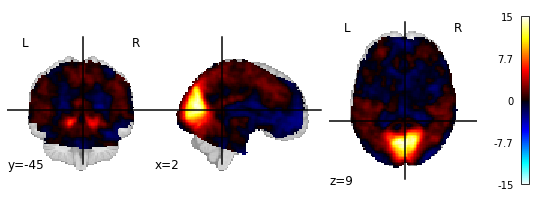

In [21]:
plotting.plot_stat_map(first_rsn)

/usr/local/lib/python3.8/dist-packages/nilearn/plotting/displays.py:101: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),


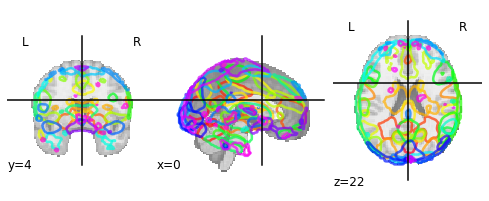

In [26]:
plotting.plot_prob_atlas(hammersmith_atlas.rsn70)

In [27]:
from nilearn import input_data

In [28]:
masker = input_data.NiftiMapsMasker(hammersmith_atlas.rsn10, t_r=2, detrend=True, low_pass=0.1, high_pass=0.01).fit()

/usr/local/lib/python3.8/dist-packages/nilearn/image/image.py:1106: FutureWarning: The parameter "sessions" will be removed in 0.9.0 release of Nilearn. Please use the parameter "runs" instead.
  data = signal.clean(


In [29]:
roi_time_series = masker.transform(fmri_filenames[0])
roi_time_series.shape

(120, 10)

In [30]:
from nilearn.connectome import ConnectivityMeasure

correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([roi_time_series])[0]

In [31]:
hammersmith_atlas.labels

AttributeError: labels

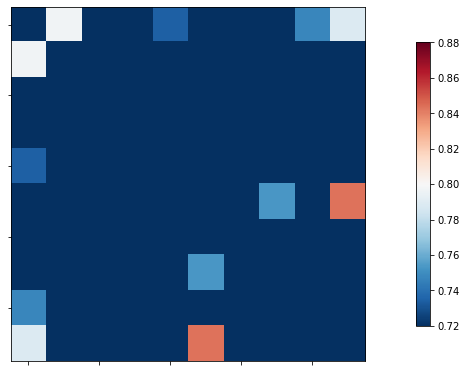

In [32]:
np.fill_diagonal(correlation_matrix,0)
plotting.plot_matrix(correlation_matrix, vmax=0.8, vmin=0.8, colorbar=True)